In [12]:
%matplotlib inline

In [13]:
import matplotlib
from matplotlib import pyplot as plt
from skimage import data,color, exposure,feature,io
from math import sqrt
from skimage.color import rgb2gray
from PIL import Image
import numpy as np
import io
from scipy import ndimage as ndi
from skimage.filters import threshold_otsu

In [14]:

im = Image.open('samples/29  ≥π‹ Í⁄√≈.bmp')
im2 = Image.open('samples/30  ≥π‹ ≥›◊¥œﬂ.bmp')
im3 = Image.open('samples/34  ≥π‹÷–…œ.bmp')
im.show()

In [15]:

npimg = np.array(im);
npimg2 = np.array(im2);
npimg3 = np.array(im3);
# npimg = io.imread('samples/29  ≥π‹ Í⁄√≈.bmp');
# npimg2 = io.imread('samples/30  ≥π‹ Í⁄√≈.bmp');
# npimg3 = io.imread('samples/34  ≥π‹ Í⁄√≈.bmp');
print(npimg.shape,npimg2.shape,npimg3.shape);

((1080, 1920, 3), (1080, 1920, 3), (1080, 1920, 3))


In [16]:
npimg.nonzero()

(array([   0,    0,    0, ..., 1079, 1079, 1079]),
 array([ 832,  833,  834, ..., 1734, 1734, 1734]),
 array([0, 0, 0, ..., 0, 1, 2]))

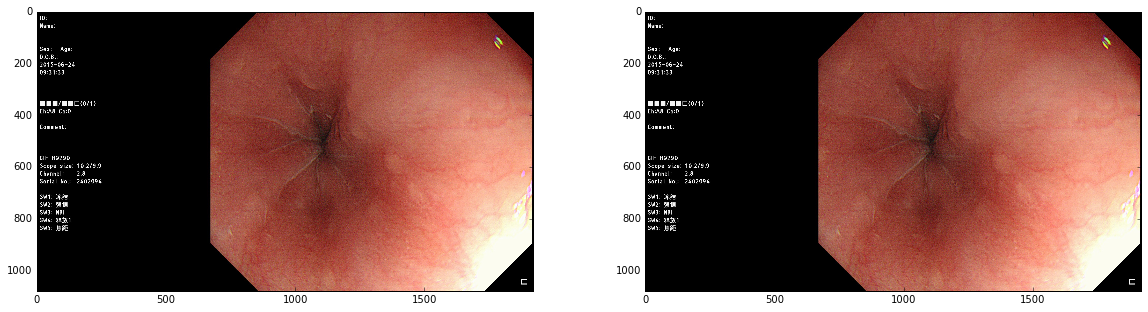

In [17]:


fig =plt.figure(figsize=(20,5))
axes = fig.add_subplot(121)
axes.imshow(npimg)
axes.set_label('sample image1')

axes2 = fig.add_subplot(122)
axes2.imshow(npimg)
axes2.set_label('sample image2')

plt.show()

In [18]:
skimage.feature.greycomatrix

NameError: name 'skimage' is not defined

In [ ]:
#conert image to gray level

grayimg = rgb2gray(npimg)
grayimg2 = rgb2gray(npimg2)
grayimg3 = rgb2gray(npimg3)

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(grayimg)
edges2 = feature.canny(grayimg, sigma=3)
edges3 = feature.canny(grayimg, sigma=2)

# display results
fig, (ax1, ax2, ax3,ax4) = plt.subplots(nrows=1, ncols=4, figsize=(15, 5), sharex=True, sharey=True)

ax1.imshow(grayimg, cmap=plt.cm.jet)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$', fontsize=20)

ax4.imshow(edges3, cmap=plt.cm.gray)
ax4.axis('off')
ax4.set_title('Canny filter, $\sigma=2$', fontsize=20)

fig.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9,
                    bottom=0.02, left=0.02, right=0.98)

plt.show()

In [ ]:

image = color.rgb2gray(data.astronaut())

fd, hog_image = feature.hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualise=True)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(25, 7), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax1.set_adjustable('box-forced')

### Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
ax2.set_adjustable('box-forced')


###esophagus image
ax3.axis('off')
ax3.imshow(grayimg, cmap=plt.cm.gray)
ax3.set_title('sample image')
ax3.set_adjustable('box-forced')



fd2, hog_image2 = feature.hog(grayimg, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualise=True)
ax4.axis('off')
ax4.imshow(hog_image2, cmap=plt.cm.gray)
ax4.set_title('sample image')
ax4.set_adjustable('box-forced')

plt.show()

In [ ]:
####thresholding 

In [ ]:
matplotlib.rcParams['font.size'] = 9


thresh = threshold_otsu(grayimg)
binary = grayimg > thresh

#fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 2.5))
fig = plt.figure(figsize=(20, 5))
ax1 = plt.subplot(1, 3, 1, adjustable='box-forced')
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3, sharex=ax1, sharey=ax1, adjustable='box-forced')

ax1.imshow(grayimg, cmap=plt.cm.gray)
ax1.set_title('Original')
ax1.axis('off')

ax2.hist(grayimg)
ax2.set_title('Histogram')
ax2.axvline(thresh, color='r')

ax3.imshow(binary, cmap=plt.cm.gray)
ax3.set_title('Thresholded')
ax3.axis('off')

plt.show()

In [ ]:
matplotlib.rcParams['font.size'] = 9


imageRef = data.camera()
threshRef = threshold_otsu(imageRef)
binaryRef = imageRef > threshRef

#fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 2.5))
fig = plt.figure(figsize=(8, 2.5))
ax1 = plt.subplot(1, 3, 1, adjustable='box-forced')
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3, sharex=ax1, sharey=ax1, adjustable='box-forced')

ax1.imshow(imageRef, cmap=plt.cm.gray)
ax1.set_title('Original')
ax1.axis('off')

ax2.hist(imageRef)
ax2.set_title('Histogram')
ax2.axvline(threshRef, color='r')

ax3.imshow(binaryRef, cmap=plt.cm.gray)
ax3.set_title('Thresholded')
ax3.axis('off')

plt.show()

In [ ]:
matplotlib.rcParams['font.size'] = 9


thresh2 = threshold_otsu(grayimg2)
binary2 = grayimg2 > thresh2

#fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 2.5))
fig = plt.figure(figsize=(20, 5))
ax1 = plt.subplot(1, 3, 1, adjustable='box-forced')
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3, sharex=ax1, sharey=ax1, adjustable='box-forced')

ax1.imshow(grayimg2, cmap=plt.cm.gray)
ax1.set_title('Original')
ax1.axis('off')

ax2.hist(grayimg2)
ax2.set_title('Histogram')
ax2.axvline(thresh, color='r')

ax3.imshow(binary2, cmap=plt.cm.gray)
ax3.set_title('Thresholded')
ax3.axis('off')

plt.show()